# 로지스틱 회귀(다중분류)

In [1]:
import pandas as pd
import numpy as np
#1.data수집
data=pd.read_csv('data1_all.csv')
data_X=data[['Weight','Length','Diagonal','Height','Width']].to_numpy()
data_Y=data['Name'].to_numpy()

#2.data전처리
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit(data_X)
data_X=ss.transform(data_X)

#3.data분리
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y=train_test_split(data_X,data_Y,random_state=42)
#4.모델 생성 및 학습 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20,max_iter=1000)#다중분류용
lr.fit(t_x,t_y)
lr.score(t_x,t_y),lr.score(tt_x,tt_y)
lr.coef_ , lr.intercept_

(array([[-1.43104781, -1.03881083,  2.68339449,  7.77024432, -1.18106054],
        [-1.41304735, -6.04954057,  5.28192373, -0.97312708,  1.92823922],
        [ 0.66899584, -2.29121452, -0.86671496,  1.64919507,  3.7778608 ],
        [ 0.20008722, -2.00035538, -3.74686768,  6.64643665, -1.95319595],
        [ 3.57308534,  6.36292416, -8.57477602, -5.8900385 ,  3.8016005 ],
        [-0.16774626,  3.61014133,  3.93270813, -3.58340455, -1.8315986 ],
        [-1.43032697,  1.4068558 ,  1.29033231, -5.61930592, -4.54184543]]),
 array([ 0.17817092,  2.5409984 ,  1.34452841, -0.06020156,  3.06520085,
        -0.24112062, -6.82757639]))

In [2]:
d=lr.decision_function(t_x[:1])#학습된 공식을 꺼냄
d

array([[ 12.68635502,   2.05193796,   6.44611303,   5.40571709,
         -3.14126816,  -3.00365919, -20.44519576]])

In [3]:
from scipy.special import softmax
np.round(softmax(d))

array([[1., 0., 0., 0., 0., 0., 0.]])

# 로지스틱 회귀(이중분류)

2종 data로 변경  

In [4]:
i=(t_y == 'A')|(t_y == 'G')
b_t_x=t_x[i]
b_t_y=t_y[i]
lr = LogisticRegression()
lr.fit(b_t_x,b_t_y)

LogisticRegression()

In [5]:
lr.coef_ , lr.intercept_

(array([[-0.41981254, -0.60056128, -0.68786241, -1.00159093, -0.74532495]]),
 array([-2.1898649]))

In [6]:
d=lr.decision_function(b_t_x[:1])#학습된 공식을 꺼냄
d

array([-5.96982853])

시그모이드 함수(구현)

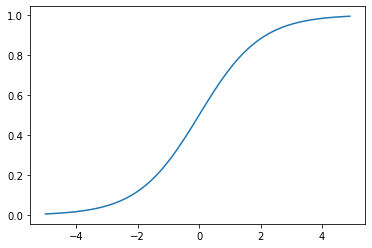

In [7]:
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1)
plt.plot(z,sigmoid(z))

시그모이드 함수 (내장)

In [8]:
from scipy.special import expit
expit(d)

array([0.00254817])